# TRABAJO SEMANAL 5
> ## Alumno: Fabrizio Hermosa
> ## Materia: Teoría de los circuitos II
> ## Curso: R4001

## <u> Consignas </u>  ##

In [7]:
from IPython.display import IFrame
IFrame("./Consignas_TS5.pdf", width=900, height=1000)

## <u> Desarrollo </u>  ##
Se adjunta un pdf con la solución de las consignas.

In [8]:
from IPython.display import IFrame
IFrame("./TS5_TC2_R4001-FabrizioHermosa.pdf", width=900, height=1000)

## <u> Simulación numérica en python </u> ##

#### Transferencia prototipo pasabajos Butterworth orden 3

<IPython.core.display.Math object>

#### Transferencia objetivo pasa altos Butterworth

<IPython.core.display.Math object>

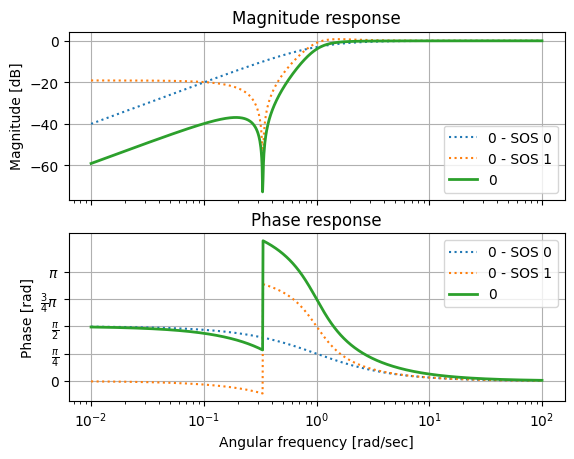

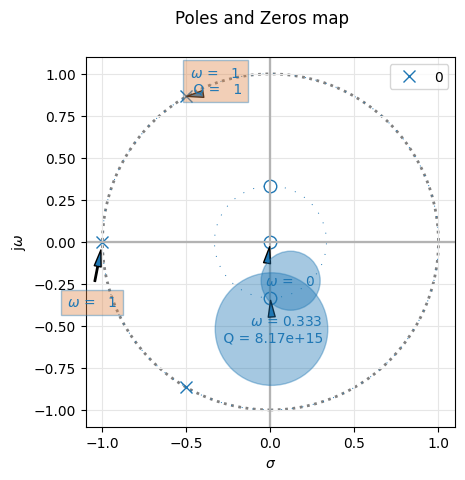

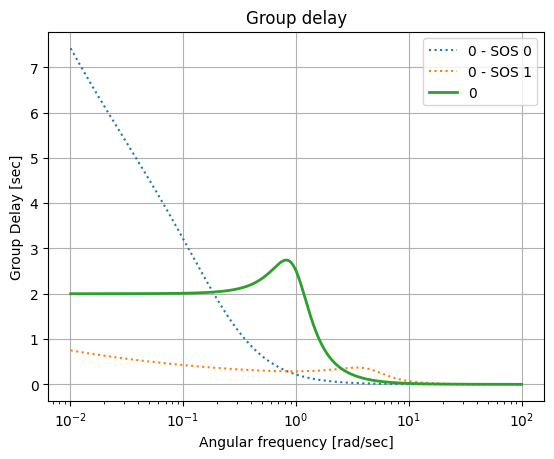

In [9]:
# importo librerias
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
#libreria de la catedra
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_SOS, tf2sos_analog
from pytc2.general import print_subtitle

#Enunciado y datos del gráfico de módulo y fase
fc = 300
fz = 100

wc = fc/fc
wz = fz/fc

orden = 3

#Pasabajos prototipo
Omega_c = 1/wc
Omega_z = 1/wz

n_z = [0, 1/(wz**2)] #cero de transmisión que agregare al array num

z, p, k = sig.buttap(orden)
num, den = sig.zpk2tf(z, p, k) #obtengo num y den de un butter orden 3

n_z = np.append(num, n_z) #asi tengo un numerador s²+wz² para el cero de transmision

n_z, den = sig.lp2lp(n_z * (1/Omega_z**2), den) #para 0dB

sos_lp = tf2sos_analog(n_z, den) 
sos_lp[sos_lp < 1e-6] = 0.0
print_subtitle("Transferencia prototipo pasabajos Butterworth orden 3")
pretty_print_SOS(sos_lp, mode='omegayq')

num2, den2 = sig.lp2hp(n_z, den)
sos_hp = tf2sos_analog(num2, den2)
sos_hp[sos_hp < 1e-6] = 0.0
print_subtitle("Transferencia objetivo pasa altos Butterworth")
pretty_print_SOS(sos_hp, mode='omegayq')

analyze_sys(sos_hp)

## <u> Simulación circuital en LTspice </u> ##

A la salida de la red propuesta se conecta la etapa de orden uno.

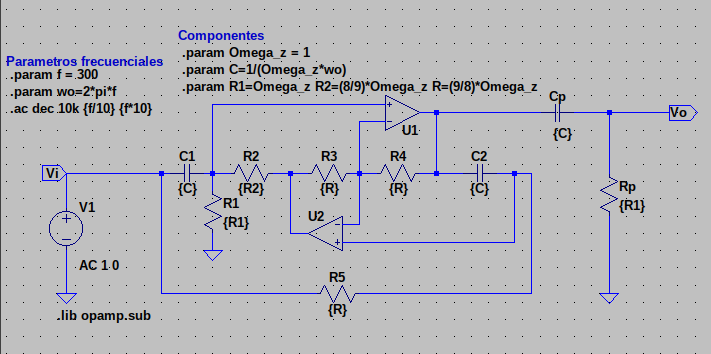

Se obtuvo la transferencia esperada:

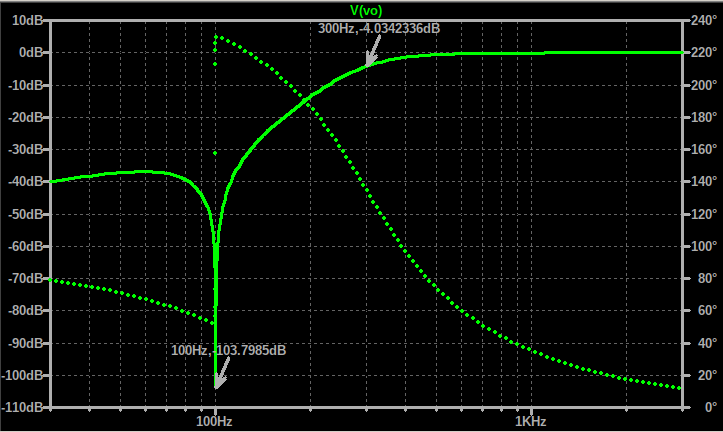

Se implementó también la red del Schaumann y se realizaron mediciones para comparar con la anterior.

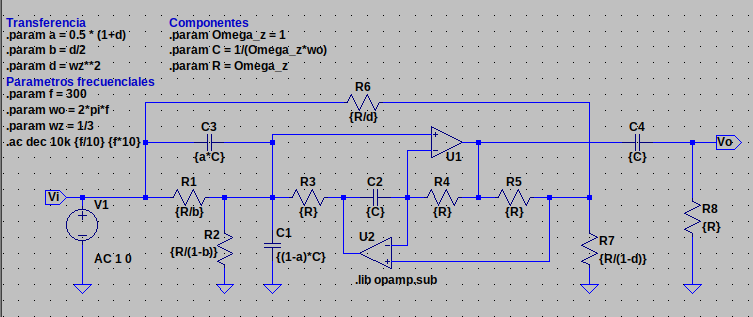

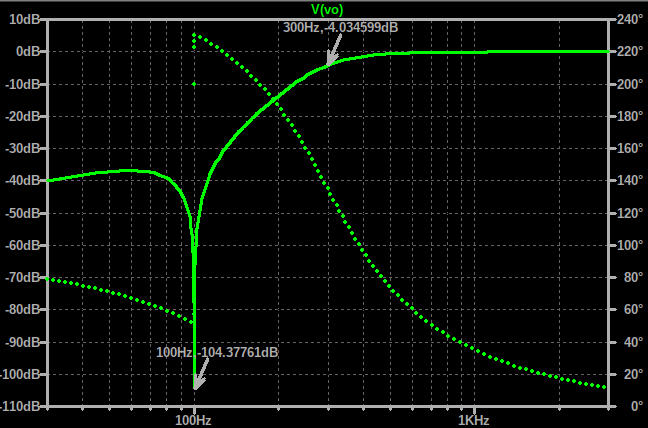

El resultado es muy parecido.

## <u> Conclusiones </u> ##

Las diferencias entre ambas redes son el levantamiento de alguno de los componentes, el orden en donde están puestos algunos (por ejemplo el capacitor en la primer red está en la posición Z4 del GIC y en la del Schaumann está en Z2) y el valor (todos las resistencias valen lo mismo sólo que afectadas por a, b ó c).

Anecdóticamente, cuando se implementó el circuito con la primer red, no se usó un buffer para conectar las dos etapas (primer orden -> segundo orden) (se me olvidó) y la forma de la transferencia fue igual, sólo que en 300Hz la atenuación era de aproximadamente 9dB, alejado bastante de lo que uno podría esperar de un filtro Butterworth a la frecuencia de corte. 

Además, se cambió el orden de las etapas (segundo orden -> primer orden), siendo que para implementar la de primer orden y después conectarla a la de segundo orden era necesario usar un operacional más como buffer cuando directamente se puede aprovechar el que ya hay a la salida de las redes propuestas.